In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import sklearn
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import linear_model
import math
from sklearn.model_selection import train_test_split
home=pd.read_csv("home_data.csv")

In [9]:
home.shape

(21613, 21)

In [10]:
home.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [16]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

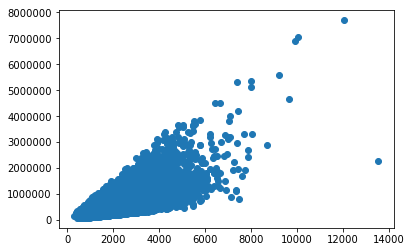

In [17]:
plt.scatter(home['sqft_living'],home['price'])
plt.show()

In [19]:
train,test=train_test_split(home,test_size=0.2)

In [22]:
sns.regplot(x="sqft_living",y="price",data=home)

In [24]:
len(home)

21613

In [25]:
train_data=home.sample(frac=0.8)

In [27]:
regr_one_feature=linear_model.LinearRegression()

In [28]:
train_data_features=train_data["sqft_living"].values

In [29]:
train_data_features


array([ 780, 1910, 2880, ...,  960, 1490,  860], dtype=int64)

In [30]:
train_data_targets=train_data["price"].values

In [16]:
train_data,test_data=train_test_split(home,test_size=0.2)
regr_one_feature=linear_model.LinearRegression()

In [17]:
train_data_features=train_data["sqft_living"].values

In [18]:
train_data_features


array([2410, 1790, 2430, ..., 1020, 2570, 1890], dtype=int64)

In [19]:
train_data.sqft_living.shape

(17290,)

In [21]:
training_data_features=np.array([train_data.sqft_living]).T
training_data_features.shape

(17290, 1)

In [24]:
training_data_targets=np.array([train_data.price]).T

In [25]:
regr_one_feature.fit(training_data_features, training_data_targets)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
regr_one_feature.coef_

array([[ 280.59951451]])

In [27]:
# Make predictions using the model and the data we set aside
test_data_features = np.array([test_data.sqft_living]).T
test_data_targets = np.array([test_data.price]).T

In [28]:
# Let's look at the variance (1 is a perfect prediction)
regr_one_feature.score(test_data_features, test_data_targets)

0.49455037087408682

In [29]:
test_data_targets.mean()

540526.20333102008

In [30]:
math.sqrt(np.mean((regr_one_feature.predict(test_data_features) - test_data_targets) ** 2))

261468.66615046092

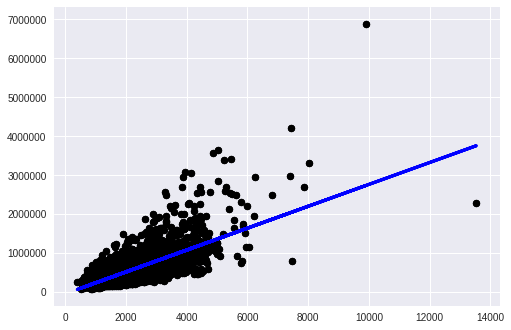

In [32]:
# Plot
plt.scatter(test_data_features, test_data_targets, color='black')
plt.plot(test_data_features, regr_one_feature.predict(test_data_features), color='blue', linewidth=3)
plt.show()

In [33]:
training_data_many_features = train_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']].values

In [34]:
training_data_many_features[0]

array([  3.00000000e+00,   2.50000000e+00,   2.41000000e+03,
         1.19000000e+04,   1.00000000e+00,   9.80230000e+04])

In [35]:
training_data_many_features.shape

(17290, 6)

In [36]:
test_data_many_features = test_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']].values

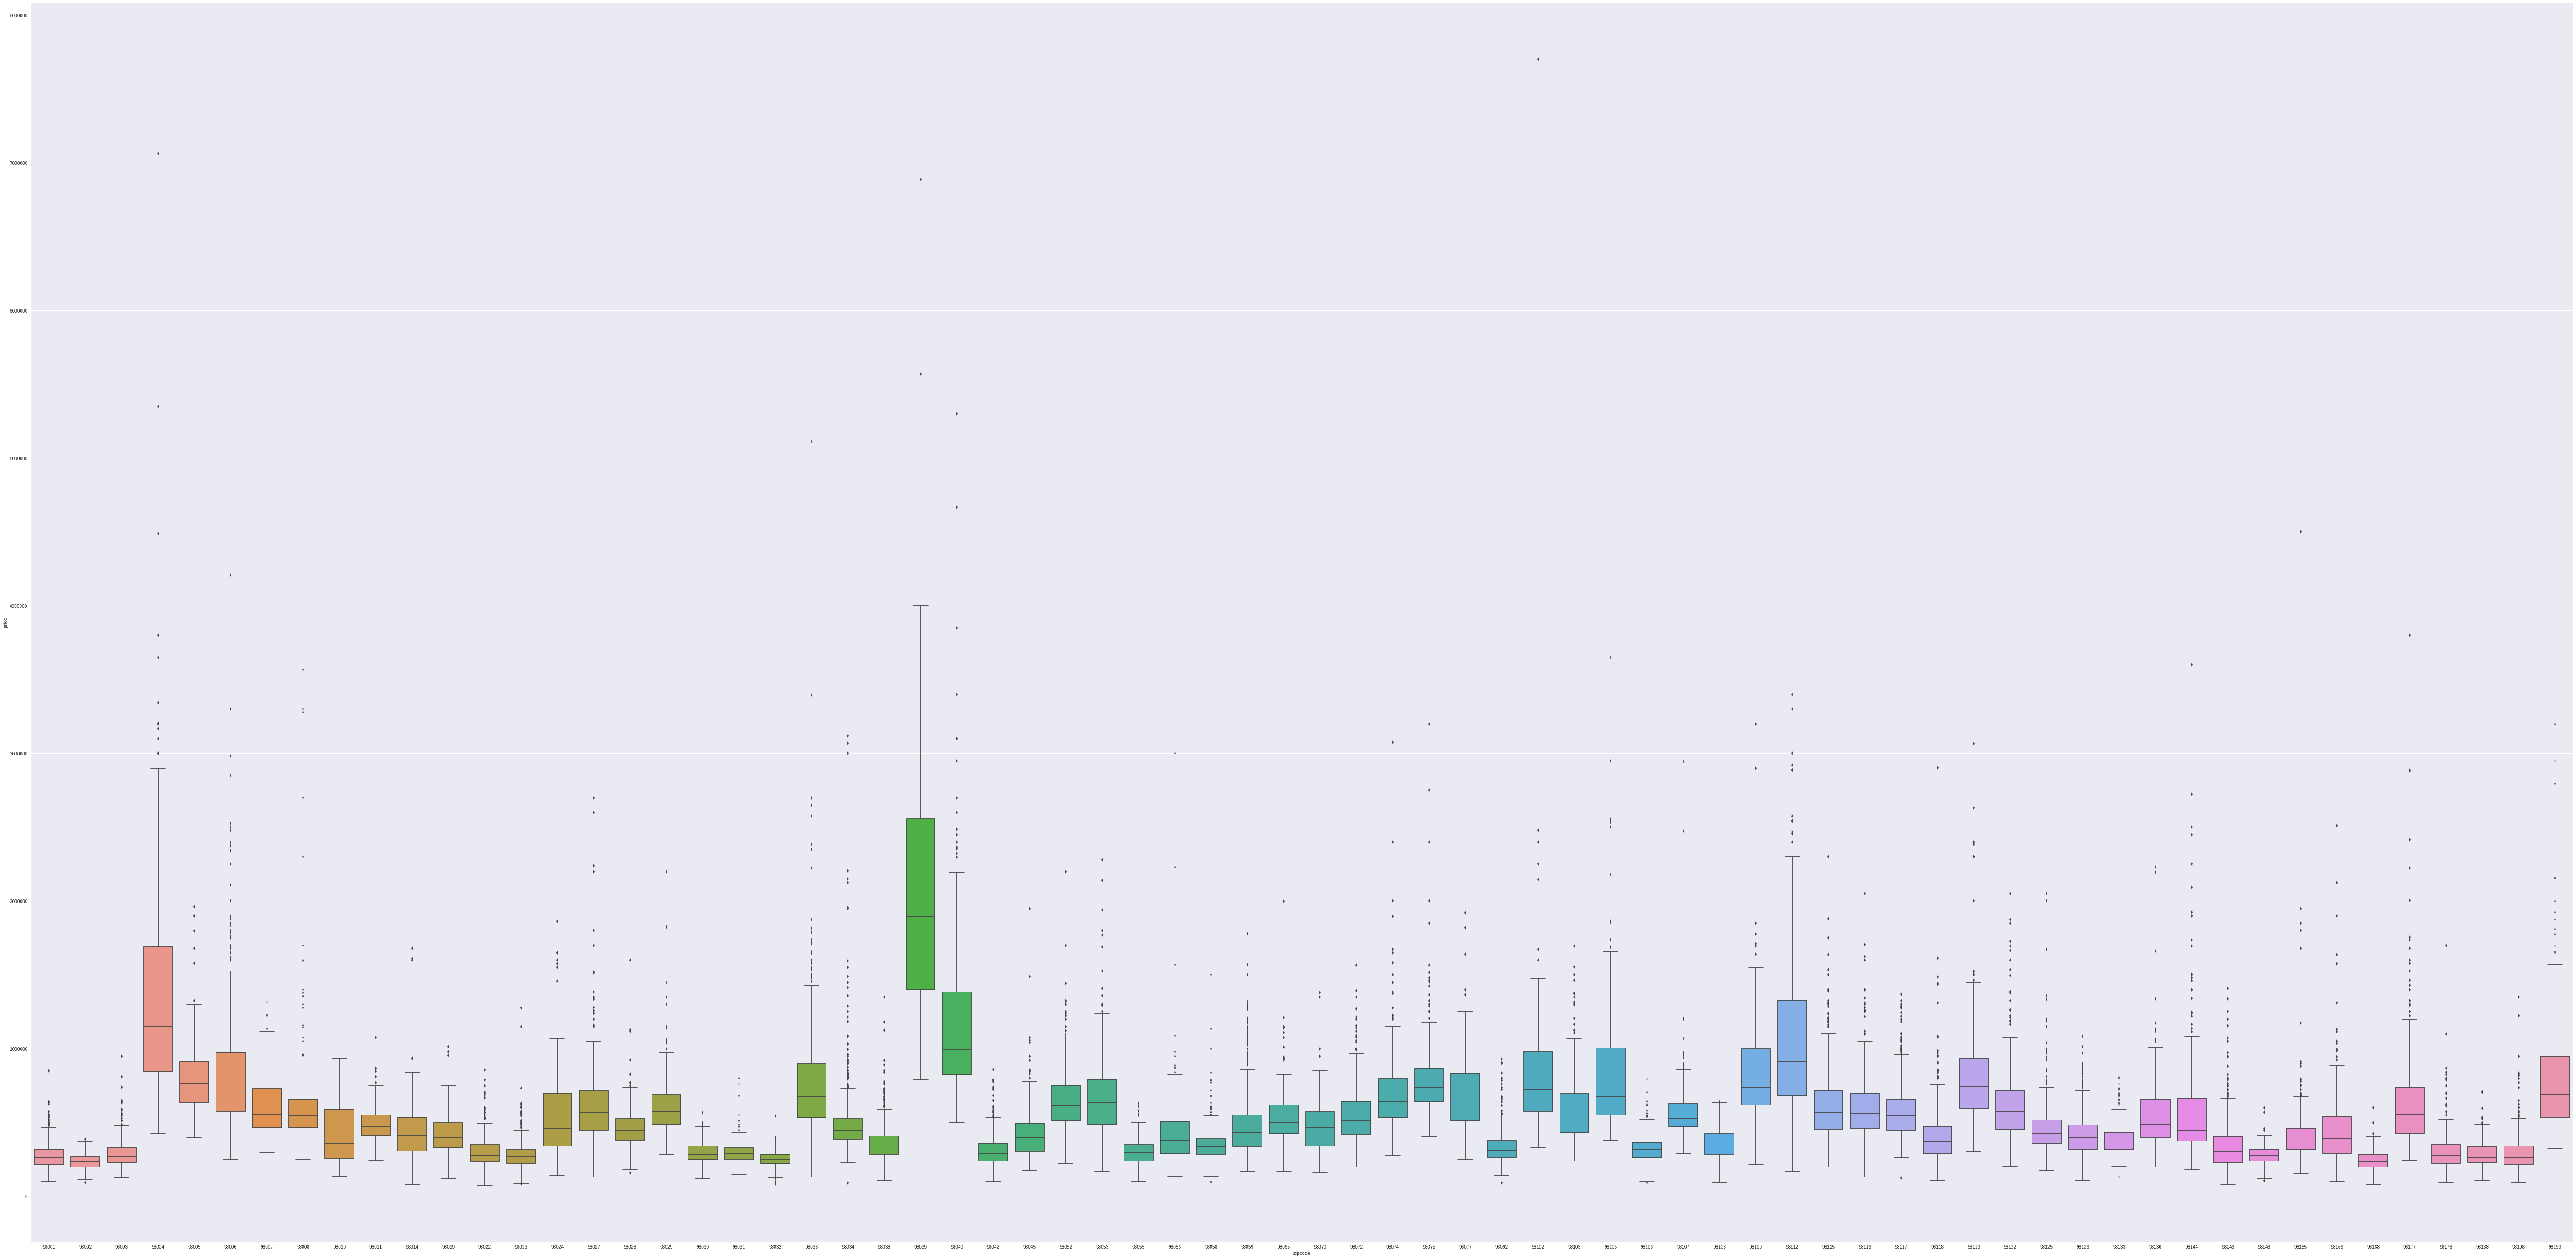

In [53]:
plt.figure(figsize=(100,50))
plot = sns.boxplot(x="zipcode", y="price", data=home)

sns.plt.show()

In [58]:
house1 = home.loc[home['zipcode'] == 98004]

In [61]:
house1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
66,3394100030,20140909T000000,975000,4,2.50,2720,11049,2.0,0,0,...,10,2720,0,1989,0,98004,47.5815,-122.192,2750,11049
69,1802000060,20140612T000000,1325000,5,2.25,3200,20158,1.0,0,0,...,8,1600,1600,1965,0,98004,47.6303,-122.215,3390,20158
103,2450000295,20141007T000000,1088000,3,2.50,2920,8113,2.0,0,0,...,8,2920,0,1950,2010,98004,47.5814,-122.196,2370,8113
125,4389200955,20150302T000000,1450000,4,2.75,2750,17789,1.5,0,0,...,8,1980,770,1914,1992,98004,47.6141,-122.212,3060,11275
269,7960900060,20150504T000000,2900000,4,3.25,5050,20100,1.5,0,2,...,11,4750,300,1982,2008,98004,47.6312,-122.223,3890,20060
393,1653500070,20140512T000000,927000,4,2.75,3300,12090,2.0,0,0,...,8,3300,0,1953,0,98004,47.6294,-122.218,3180,12239
427,9808650060,20150225T000000,1300000,3,2.00,2350,15021,1.0,0,0,...,8,1770,580,1976,0,98004,47.6408,-122.219,3530,15715
525,4348800030,20141121T000000,727500,2,2.00,1240,9119,1.0,0,0,...,7,1240,0,1952,0,98004,47.6221,-122.193,1380,9121
659,708000030,20140902T000000,888000,3,1.50,1250,8710,1.0,0,0,...,7,1250,0,1953,0,98004,47.6245,-122.198,1750,9185
699,6664000030,20141009T000000,980000,4,2.25,2240,11034,2.0,0,0,...,8,2240,0,1976,0,98004,47.5894,-122.195,2300,11550


In [68]:
sum1=sum(house1.price.values)
sum1
average=sum1/317
average

1355927.0977917982

In [72]:
val=list(home.sqft_living.values)

In [73]:
val


[1180,
 2570,
 770,
 1960,
 1680,
 5420,
 1715,
 1060,
 1780,
 1890,
 3560,
 1160,
 1430,
 1370,
 1810,
 2950,
 1890,
 1600,
 1200,
 1250,
 1620,
 3050,
 2270,
 1070,
 2450,
 1710,
 2450,
 1400,
 1520,
 2570,
 2320,
 1190,
 2330,
 1090,
 2060,
 2300,
 1660,
 2360,
 1220,
 2620,
 2570,
 4220,
 3595,
 1570,
 1280,
 3160,
 990,
 2290,
 1250,
 2753,
 1190,
 3150,
 1410,
 1980,
 2730,
 2830,
 2250,
 2420,
 3250,
 1850,
 2150,
 1260,
 2519,
 1540,
 1660,
 2770,
 2720,
 2240,
 1000,
 3200,
 4770,
 1260,
 2750,
 2380,
 1790,
 3430,
 1760,
 1040,
 1410,
 3450,
 2350,
 1900,
 2020,
 1680,
 960,
 2140,
 2660,
 2770,
 1610,
 1030,
 1980,
 3520,
 1200,
 1580,
 1580,
 3300,
 1960,
 1160,
 1810,
 2320,
 2070,
 1980,
 2190,
 2920,
 1210,
 2340,
 1670,
 1240,
 3140,
 2030,
 2310,
 1260,
 1540,
 2080,
 3230,
 4380,
 1590,
 880,
 1570,
 1610,
 2400,
 1450,
 770,
 2100,
 2910,
 2750,
 2100,
 2160,
 2320,
 2070,
 1060,
 2010,
 3950,
 2010,
 2140,
 1320,
 2020,
 2590,
 1190,
 1170,
 1110,
 2820,
 1610,
 106

In [76]:
len(val)

21613

In [77]:
count=0
for valu in val:
    if(valu>2000 and valu<=4000):
        count+=1
        

In [78]:
count

9118

In [79]:
count/21613

0.42187572294452413

In [90]:
advanced_features = train_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode','condition', 'grade','waterfront','view','sqft_above', 'sqft_basement','yr_built', 'yr_renovated','lat', 'long', 'sqft_living15','sqft_lot15']].values
my_features = train_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']].values

In [91]:
regr_many_features = linear_model.LinearRegression()
regr_many_features.fit(my_features, training_data_targets)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(test_data_targets, regr_many_features.predict(test_data_many_features)))

257891.3047464728

In [93]:
regr_many_features = linear_model.LinearRegression()
regr_many_features.fit(advanced_features, training_data_targets)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)